## Beatriz Haas - Matrícula: 202208807062 - MBA Ibmec BI & Data Science
### professor Sergio Monteiro, disciplina Projeto Aplicado: Análise Preditiva e Vantagem Competitiva

#### Instalação dos pacotes

In [97]:
# yahoo finance
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [98]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [99]:
pip install --upgrade pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Importação dos pacotes

In [100]:
import pandas as pd
import numpy as np
import yfinance as yf 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### Baixar os dados das ações

In [101]:
import requests
url = "https://investnews.com.br/financas/veja-a-lista-completa-dos-bdrs-disponiveis-para-pessoas-fisicas-na-b3/"
r = requests.get(url)
html = r.text
df_nomes_tickers = pd.read_html(html, header=0)[0]
df_nomes_tickers.head(10)

,EMPRESA,CÓDIGO,SETOR,PAÍS DE ORIGEM
0,3M,MMMC34,Indústria diversificada,EUA
1,AB INBEV,ABUD34,Bebidas,Bélgica
2,ABB LTD,A1BB34,Industrial,Switzerland
3,ABBOTT,ABTT34,Farmacêuticos,EUA
4,ABBVIE,ABBV34,Medicamentos e Outros Produtos,EUA
5,ABIOMED INC,A1BM34,Saúde,EUA
6,ACTIVISION,ATVI34,Tecnologia,EUA
7,ADOBE INC,ADBE34,Tecnologia,EUA
8,ADVANCE AUTO PARTS INC,A1AP34,Peças Automotivas,EUA
9,ADVANCED MIC,A1MD34,Tecnologia,EUA


In [102]:
with pd.option_context('display.max_rows',10):
  print(df_nomes_tickers)

           EMPRESA  CÓDIGO                                   SETOR  \
0               3M  MMMC34                 Indústria diversificada   
1         AB INBEV  ABUD34                                 Bebidas   
2          ABB LTD  A1BB34                              Industrial   
3           ABBOTT  ABTT34                           Farmacêuticos   
4           ABBVIE  ABBV34          Medicamentos e Outros Produtos   
..             ...     ...                                     ...   
703  RAYTHEON TECH  RYTT34                              Industrial   
704   SCHLUMBERGER  SLBG34  Equipamentos e Serviços de Combustível   
705        TIFFANY  TIFF34                               Joalheria   
706     US BANCORP  USBC34                  Instituição Financeira   
707         XP INC  XPBR31                              Financeiro   

    PAÍS DE ORIGEM  
0              EUA  
1          Bélgica  
2      Switzerland  
3              EUA  
4              EUA  
..             ...  
703         

In [103]:
dados_series = yf.download(["MMMC34.SA", "COCA34.SA","GOGL34.SA","GOGL35.SA","PFIZ34.SA","SSFO34.SA","VISA34.SA","MCDC34.SA","IBMB34.SA","JNJB34.SA"], start="2018-01-01", end="2022-01-01")

[*********************100%***********************]  10 of 10 completed


In [104]:
with pd.option_context('display.max_rows',10):
  print(dados_series)

            Adj Close                                                          \
            COCA34.SA  GOGL34.SA  GOGL35.SA   IBMB34.SA  JNJB34.SA  MCDC34.SA   
Date                                                                            
2018-01-02  21.591042  14.550000  14.489583  394.586975  26.716492  25.334597   
2018-01-03  21.446621  14.784375  14.655208  399.708435  26.840097  24.733917   
2018-01-04  21.576597  14.798958  14.677083  399.708435  26.804785  24.915888   
2018-01-05  21.446621  14.929166  14.803125  406.226776  26.869528  24.940622   
2018-01-08  21.576597  15.061458  14.960416  411.130890  27.046108  24.892921   
...               ...        ...        ...         ...        ...        ...   
2021-12-23  53.536556  70.037498  69.949997  698.695862  61.924644  73.335205   
2021-12-27  53.633728  69.625000  69.618752  698.018066  61.731129  73.480980   
2021-12-28  53.828049  69.099998  69.000000  704.984314  61.973022  73.218590   
2021-12-29  54.702511  70.03

In [105]:
#Selecionar apenas os dados referentes ao preço de fechamento
df = dados_series.drop(['Open','High', 'Low', 'Adj Close', 'Volume'], axis=1) 
df

Close                                                          \
            COCA34.SA  GOGL34.SA  GOGL35.SA   IBMB34.SA  JNJB34.SA  MCDC34.SA   
Date                                                                            
2018-01-02  24.916666  14.550000  14.489583  508.500000  30.260000  28.680000   
2018-01-03  24.750000  14.784375  14.655208  515.099976  30.400000  28.000000   
2018-01-04  24.900000  14.798958  14.677083  515.099976  30.360001  28.205999   
2018-01-05  24.750000  14.929166  14.803125  523.500000  30.433332  28.233999   
2018-01-08  24.900000  15.061458  14.960416  529.820007  30.633333  28.180000   
...               ...        ...        ...         ...        ...        ...   
2021-12-23  55.099998  70.037498  69.949997  742.200012  64.000000  75.459999   
2021-12-27  55.200001  69.625000  69.618752  741.479980  63.799999  75.610001   
2021-12-28  55.400002  69.099998  69.000000  748.880005  64.050003  75.339996   
2021-12-29  56.299999  70.031250  69.937500  763.320007  65.489998  76.910004   
2021-12-30  54.290001  67.537498  67.425003  741.960022  63.669998  74.080002   

                                                         
             MMMC34.SA  PFIZ34.SA  SSFO34.SA  VISA34.SA  
Date                                                     
2018-01-02  191.039993  29.735001  15.454545  18.680000  
2018-01-03  191.100006  29.695000  15.554545  18.847500  
2018-01-04  192.899994  29.895000  15.713636  18.842501  
2018-01-05  193.199997  29.725000  15.860000  19.069500  
2018-01-08  194.399994  29.590000  16.063637  19.330000  
...                ...        ...        ...        ...  
2021-12-23  249.470001  83.589996  65.669998  61.209999  
2021-12-27  248.509995  83.360001  66.089996  61.200001  
2021-12-28  250.839996  81.540001  65.709999  61.270000  
2021-12-29  255.399994  82.269997  66.309998  62.480000  
2021-12-30  246.250000  80.879997  64.389999  60.360001  

[989 rows x 10 columns]

In [106]:
df['Close'].columns

Index(['COCA34.SA', 'GOGL34.SA', 'GOGL35.SA', 'IBMB34.SA', 'JNJB34.SA',
       'MCDC34.SA', 'MMMC34.SA', 'PFIZ34.SA', 'SSFO34.SA', 'VISA34.SA'],
      dtype='object')

In [107]:
y=[]
for a in df['Close']:
  y.append(a)

In [108]:
x = np.arange (1,len(df)+1,1)

### Padronização dos dados

In [109]:
def filtro_ativo(ativo):
  df_filtro = df['Close'][ativo]
  return df_filtro

In [110]:
def ativo_normal(ativo):
  y = filtro_ativo(ativo)
  minimo = np.min(y)
  maximo = np.max(y)
  y = (y- minimo)/(maximo - minimo)
  return y

In [111]:
selecao = ["MMMC34.SA", "COCA34.SA","GOGL34.SA","GOGL35.SA","PFIZ34.SA","SSFO34.SA","VISA34.SA","MCDC34.SA","IBMB34.SA","JNJB34.SA"]

In [112]:
y = []
for b in selecao:
  ativo = ativo_normal(b)
  y.append(ativo)

### Visualização das Séries

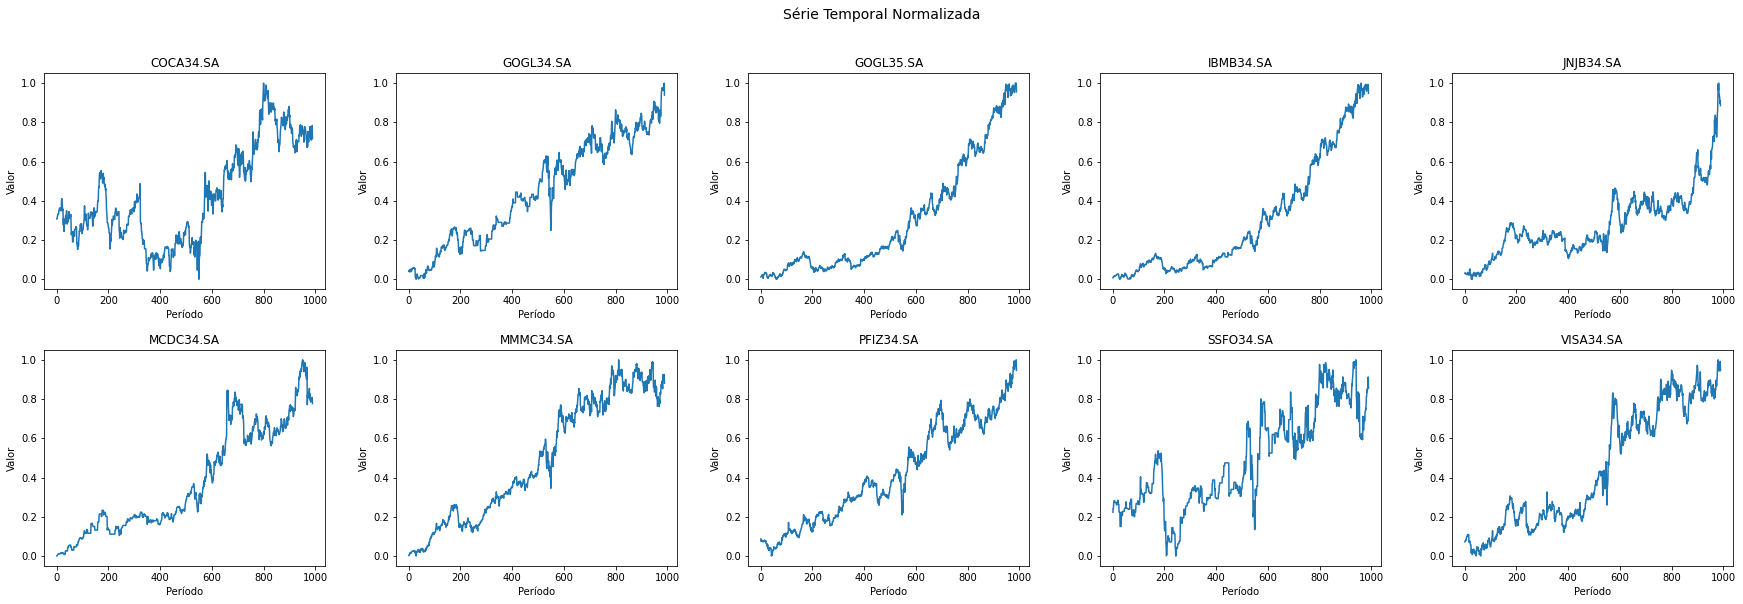

In [113]:
title = "Série Temporal Normalizada"

fig1, ax = plt.subplots(2,5, figsize = (25,9))
fig1.suptitle(title, y=0.95, fontsize=14)
fig1.tight_layout(pad=4)

cont=0
for c in range(2):
  for d in range(5):
    ax[c][d].plot(x,y[cont])
    ax[c][d].set(xlabel='Período' , ylabel = 'Valor')
    ax[c][d].title.set_text(df['Close'].columns[cont])
    cont = cont+1

### Preparação dos conjuntos de dados de treinamento e de teste

In [114]:
treinos = []
testes = []

for i in range(len(selecao)):
  percentual_treinamento = 0.8
  qtd_treinamento = int(percentual_treinamento*(len(x)));

  x_treino = x[0:qtd_treinamento] 
  x_teste = x[qtd_treinamento:]

  y_treino = y[i][0:qtd_treinamento]
  y_teste = y[i][qtd_treinamento:]

  treino = np.array(list(zip(x_treino, y_treino)))
  teste = np.array(list(zip(x_teste, y_teste)))
  for j in range(5):
    print('treino[{}]: {}{}'.format(selecao[i], j+1, treino[j]))

treino[MMMC34.SA]: 1[1.        0.3074416]
treino[MMMC34.SA]: 2[2.         0.30788597]
treino[MMMC34.SA]: 3[3.         0.32121428]
treino[MMMC34.SA]: 4[4.        0.3234357]
treino[MMMC34.SA]: 5[5.         0.33232128]
treino[COCA34.SA]: 1[1.         0.04367697]
treino[COCA34.SA]: 2[2.         0.03859827]
treino[COCA34.SA]: 3[3.        0.0431691]
treino[COCA34.SA]: 4[4.         0.03859827]
treino[COCA34.SA]: 5[5.        0.0431691]
treino[GOGL34.SA]: 1[1.         0.01143198]
treino[GOGL34.SA]: 2[2.         0.01560761]
treino[GOGL34.SA]: 3[3.         0.01586742]
treino[GOGL34.SA]: 4[4.         0.01818721]
treino[GOGL34.SA]: 5[5.         0.02054413]
treino[GOGL35.SA]: 1[1.         0.00754913]
treino[GOGL35.SA]: 2[2.         0.01049106]
treino[GOGL35.SA]: 3[3.         0.01087962]
treino[GOGL35.SA]: 4[4.         0.01311847]
treino[GOGL35.SA]: 5[5.         0.01591236]
treino[PFIZ34.SA]: 1[1.         0.02973279]
treino[PFIZ34.SA]: 2[2.         0.02906368]
treino[PFIZ34.SA]: 3[3.         0.032409

### Organização do modelo de dados

In [115]:
def create_dataset(n_X, look_back):
  dataX = []
  dataY = []
  for i in range(len(n_X)-look_back):
    a = n_X[i:(i+look_back), ]
    print('a: {}'.format(a))
    dataX.append(a)
    dataY.append(n_X[i + look_back, ])
  print('dataX: {}'.format(dataX))
  return np.array(dataX), np.array(dataY)

In [116]:
def preparar_dados(dados_serie, look_back):
  X, y =[],[]
  n = len(dados_serie)
  for i in range(n - look_back):
    posicao_fim = i + look_back
    if posicao_fim <= n:
      seq_x = dados_serie[i:posicao_fim,1]
      seq_y = dados_serie[posicao_fim,1]
      X.append(seq_x)
      y.append(seq_y)
  return np.array(X), np.array(y)

### Visualização da estruturação dos dados

In [122]:
x_treinos, y_treinos = [], []
x_testes, y_testes = [], []
for n in range(len(selecao)):  
    look_back = 2
    x_treino, y_treino = preparar_dados(treino, look_back)
    x_teste, y_teste = preparar_dados(teste, look_back)

    n_caracteristicas = 1
    x_treino = x_treino.reshape((x_treino.shape[0], 
                              x_treino.shape[1], 
                              n_caracteristicas))
    x_teste = x_teste.reshape((x_teste.shape[0], 
                        x_teste.shape[1], 
                        n_caracteristicas))
    x_treinos.append(x_treino)
    y_treinos.append(y_treino)
    x_testes.append(x_teste)
    y_testes.append(y_teste)

    #print('ax: {}'.format(trainx))
    #print('y: {}'.format(y))
    for i in range(5):
      print('treino[{}]: {} -> {}'.format(i+1, x_treino[i], y_treino[i]))

treino[1]: [[0.07239109]
 [0.07604719]] -> 0.07500260883187343
treino[2]: [[0.07604719]
 [0.07500261]] -> 0.07691767821683913
treino[3]: [[0.07500261]
 [0.07691768]] -> 0.08214072151199178
treino[4]: [[0.07691768]
 [0.08214072]] -> 0.08214072151199178
treino[5]: [[0.08214072]
 [0.08214072]] -> 0.09363138687494817
treino[1]: [[0.07239109]
 [0.07604719]] -> 0.07500260883187343
treino[2]: [[0.07604719]
 [0.07500261]] -> 0.07691767821683913
treino[3]: [[0.07500261]
 [0.07691768]] -> 0.08214072151199178
treino[4]: [[0.07691768]
 [0.08214072]] -> 0.08214072151199178
treino[5]: [[0.08214072]
 [0.08214072]] -> 0.09363138687494817
treino[1]: [[0.07239109]
 [0.07604719]] -> 0.07500260883187343
treino[2]: [[0.07604719]
 [0.07500261]] -> 0.07691767821683913
treino[3]: [[0.07500261]
 [0.07691768]] -> 0.08214072151199178
treino[4]: [[0.07691768]
 [0.08214072]] -> 0.08214072151199178
treino[5]: [[0.08214072]
 [0.08214072]] -> 0.09363138687494817
treino[1]: [[0.07239109]
 [0.07604719]] -> 0.0750026088

In [123]:
look_back = 2
x_treino, y_treino = preparar_dados(treino, look_back)
x_teste, y_teste = preparar_dados(teste, look_back)

In [124]:
x_teste.shape

(196, 2)

In [125]:
x_teste

array([[0.84905466, 0.84618198],
       [0.84618198, 0.80883735],
       [0.80883735, 0.82737906],
       [0.82737906, 0.82320065],
       [0.82320065, 0.87595319],
       [0.87595319, 0.88195966],
       [0.88195966, 0.92217696],
       [0.92217696, 0.94672524],
       [0.94672524, 0.94124099],
       [0.94124099, 0.89997915],
       [0.89997915, 0.90363525],
       [0.90363525, 0.92661659],
       [0.92661659, 0.89292806],
       [0.89292806, 0.89136112],
       [0.89136112, 0.8725583 ],
       [0.8725583 , 0.8796093 ],
       [0.8796093 , 0.89971795],
       [0.89971795, 0.87099136],
       [0.87099136, 0.86211221],
       [0.86211221, 0.86394027],
       [0.86394027, 0.86602952],
       [0.86602952, 0.8615899 ],
       [0.8615899 , 0.89136112],
       [0.89136112, 0.85453881],
       [0.85453881, 0.87778125],
       [0.87778125, 0.84357051],
       [0.84357051, 0.8396532 ],
       [0.8396532 , 0.79160138],
       [0.79160138, 0.80753162],
       [0.80753162, 0.82685685],
       [0.

### Criação do Modelo de Redes Neurais

In [144]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
n_etapas = x_treino.shape[1]
n_caracteristicas = 1 
epocas = 20
n_unidades = 100
tf.random.set_seed(8888) # Setting seed to ensure reproducibility.
modelo = Sequential()
camada_de_entrada=(n_etapas, n_caracteristicas)
modelo.add(LSTM(n_unidades, 
               return_sequences = True, 
               input_shape = camada_de_entrada))
modelo.add(Dropout(0.2))
modelo.add(LSTM(128,
               input_shape = camada_de_entrada))
modelo.add(Dense(1))

### Visualização do Modelo

In [145]:
modelo.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 100)            40800     
                                                                 
 dropout_3 (Dropout)         (None, 2, 100)            0         
                                                                 
 lstm_7 (LSTM)               (None, 128)               117248    
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 158,177
Trainable params: 158,177
Non-trainable params: 0
_________________________________________________________________


### Escolha de Hiperparâmetros

In [146]:
modelo.compile(loss = 'mean_squared_error', optimizer = 'adam')

### Treinamento do Modelo

In [147]:
historico = modelo.fit(x_treino, y_treino,
                       epochs = epocas,
                       batch_size = 70,
                       verbose = 2,
                       shuffle = False,
                       validation_split = 0.3)

Epoch 1/20
8/8 - 6s - loss: 0.0283 - val_loss: 0.2860 - 6s/epoch - 772ms/step
Epoch 2/20
8/8 - 0s - loss: 0.0054 - val_loss: 0.1134 - 148ms/epoch - 18ms/step
Epoch 3/20
8/8 - 0s - loss: 0.0059 - val_loss: 0.0678 - 144ms/epoch - 18ms/step
Epoch 4/20
8/8 - 0s - loss: 0.0071 - val_loss: 0.0949 - 143ms/epoch - 18ms/step
Epoch 5/20
8/8 - 0s - loss: 0.0049 - val_loss: 0.0950 - 134ms/epoch - 17ms/step
Epoch 6/20
8/8 - 0s - loss: 0.0033 - val_loss: 0.0613 - 148ms/epoch - 19ms/step
Epoch 7/20
8/8 - 0s - loss: 0.0026 - val_loss: 0.0344 - 149ms/epoch - 19ms/step
Epoch 8/20
8/8 - 0s - loss: 0.0023 - val_loss: 0.0233 - 141ms/epoch - 18ms/step
Epoch 9/20
8/8 - 0s - loss: 0.0015 - val_loss: 0.0126 - 151ms/epoch - 19ms/step
Epoch 10/20
8/8 - 0s - loss: 8.6621e-04 - val_loss: 0.0035 - 149ms/epoch - 19ms/step
Epoch 11/20
8/8 - 0s - loss: 6.5135e-04 - val_loss: 0.0012 - 192ms/epoch - 24ms/step
Epoch 12/20
8/8 - 0s - loss: 4.9740e-04 - val_loss: 0.0016 - 139ms/epoch - 17ms/step
Epoch 13/20
8/8 - 0s - loss

### Visualização fo "aprendizado"

In [148]:
import pandas as pd
hist = pd.DataFrame(historico.history)
hist.head()

,loss,val_loss
0,0.028300,0.285961
1,0.005423,0.113359
2,0.005901,0.067843
3,0.007110,0.094947
4,0.004922,0.095030


### Precisão do Modelo

In [149]:
loss = modelo.evaluate(x_teste, y_teste, batch_size=64)
print("loss: {}".format(loss))

4/4 [==============================] - 0s 7ms/step - loss: 0.0028
loss: 0.002847110852599144


#### Visualização do Processo de Aprendizado

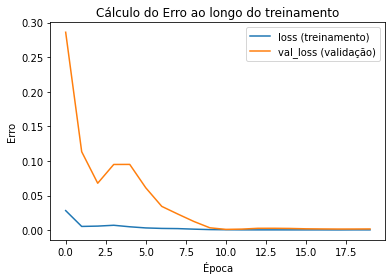

In [150]:
plt.title('Cálculo do Erro ao longo do treinamento')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.legend(['loss (treinamento)', 'val_loss (validação)'], loc='upper right')
plt.show()

### Realização da Predição

In [151]:
predicao = modelo.predict(x_teste)

7/7 [==============================] - 1s 4ms/step


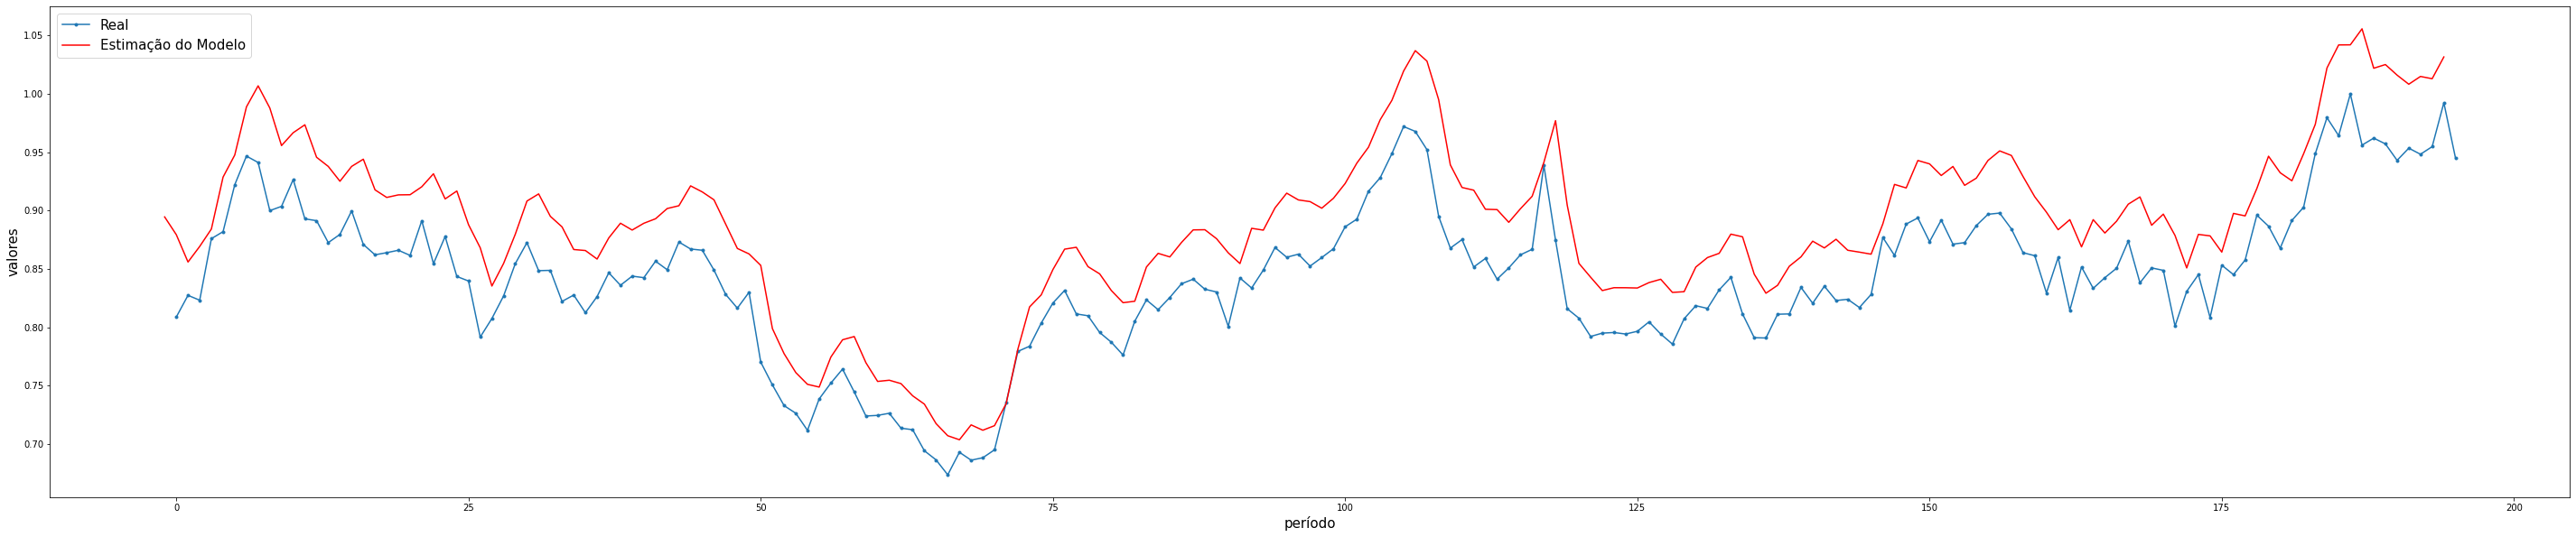

In [152]:
look_back = 1
valores_reais_y = y_teste
plt.figure(figsize=(50,10))
plt.plot(list(range(len(valores_reais_y))), 
         valores_reais_y, 
         marker='.', 
         label="Real")
lst_dados_predicao=[w[0] for w in predicao]
plt.plot(list(np.arange(len(predicao))-look_back), 
         lst_dados_predicao, 
         'r',label="Estimação do Modelo")
plt.ylabel('valores', size=15)
plt.xlabel('período', size=15)
plt.legend(fontsize=15)
plt.show()

### Fazendo Predições

In [153]:
len(valores_reais_y)

196

In [154]:
len(lst_dados_predicao)

196

In [155]:
n=len(x_teste)
x_teste[n-1] #lembrar que no Python a indexação começa na posição 0

array([0.95482096, 0.99242659])

In [161]:
minha_predicao = modelo.predict([x_teste[n-1]])

ValueError: ignored

In [157]:
print(f'minha predição é: {minha_predicao}')

NameError: ignored